# Evaluation Project 4 - HR Analytics dataset

Objective - To develop an ML model to predict employee attrition based on provided attributes

Approach - Target variable/Attrition is categorical in nature hence classification will be a better approach

# Importing Libraries

# Loading dataset

In [107]:
hr_a = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

<IPython.core.display.Javascript object>

In [108]:
hr_a.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Performing EDA - Cleaning, Formating Analysing Data - Various factors Personal or professional can play role in employee turnover, try to understand the impact of various factors

In [109]:
hr_a.shape # Checking no of rows & columns

(1470, 35)

In [110]:
hr_a.columns # Checking all column Names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [111]:
hr_a.info() # Checking datatype & presence of null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<IPython.core.display.Javascript object>

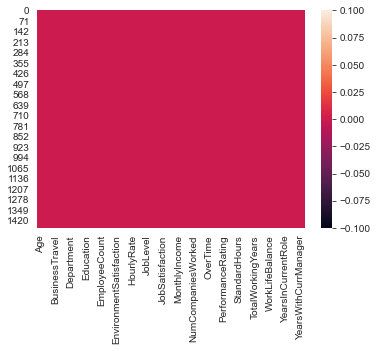

In [112]:
sns.heatmap(hr_a.isnull()) # Verifying null values

In [113]:
hr_a.describe() # To check statistical summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualization

Univariate analysis

<IPython.core.display.Javascript object>

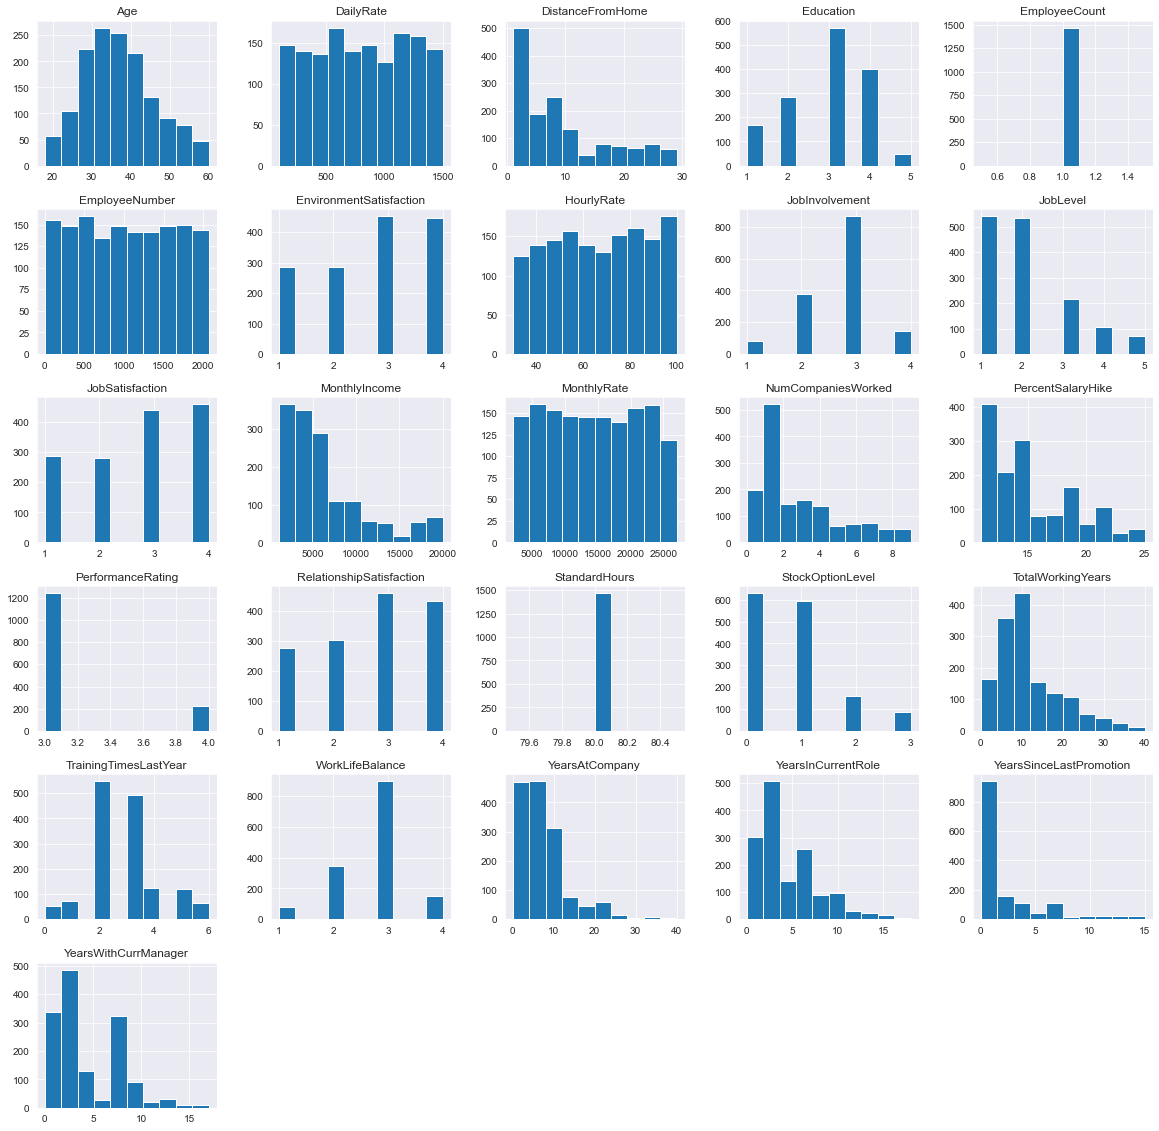

In [114]:
hr_a.hist(figsize=(20,20))
plt.show()

<IPython.core.display.Javascript object>

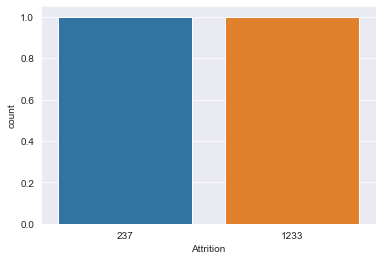

In [115]:
sns.countplot(hr_a['Attrition'].value_counts()) # Visual representation of attrition rate

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64


<IPython.core.display.Javascript object>

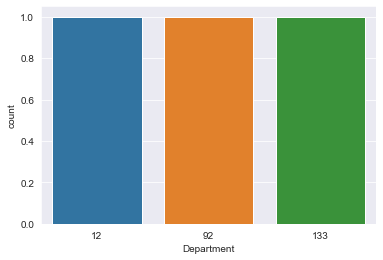

In [116]:
print(hr_a[hr_a['Attrition']=='Yes']['Department'].value_counts())
sns.countplot(hr_a[hr_a['Attrition']=='Yes']['Department'].value_counts()) # Visual representation of attrition rate 
## per department

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64
237


<IPython.core.display.Javascript object>

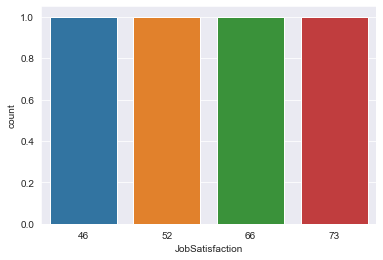

In [117]:
print(hr_a[hr_a['Attrition']=='Yes']['JobSatisfaction'].value_counts())
print(hr_a[hr_a['Attrition']=='Yes']['JobSatisfaction'].value_counts().sum())
sns.countplot(hr_a[hr_a['Attrition']=='Yes']['JobSatisfaction'].value_counts()) # Visual representation of attrition rate 
## per department

Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

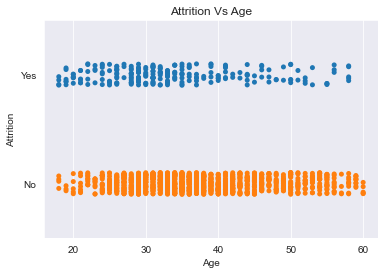

In [118]:
sns.stripplot(hr_a['Age'],hr_a['Attrition'])
plt.title('Attrition Vs Age')
plt.show()

In [119]:
hr_a.columns.to_series().groupby(hr_a.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [120]:
from sklearn.preprocessing import LabelEncoder
list = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'Over18', 'OverTime']
le = LabelEncoder()
for i in list:
    hr_a[i]= le.fit_transform(hr_a[i].astype(str))

In [121]:
hr_a.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [122]:
hr_a.drop(['BusinessTravel','EmployeeCount','Over18','StandardHours'], axis = 1, inplace =True) # Droping columns having no 
#impact on attrition

In [123]:
hr_a.shape # Rechecking shape to confirm dropped columns

(1470, 31)

In [124]:
hr_a.skew() # Checking skewness

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

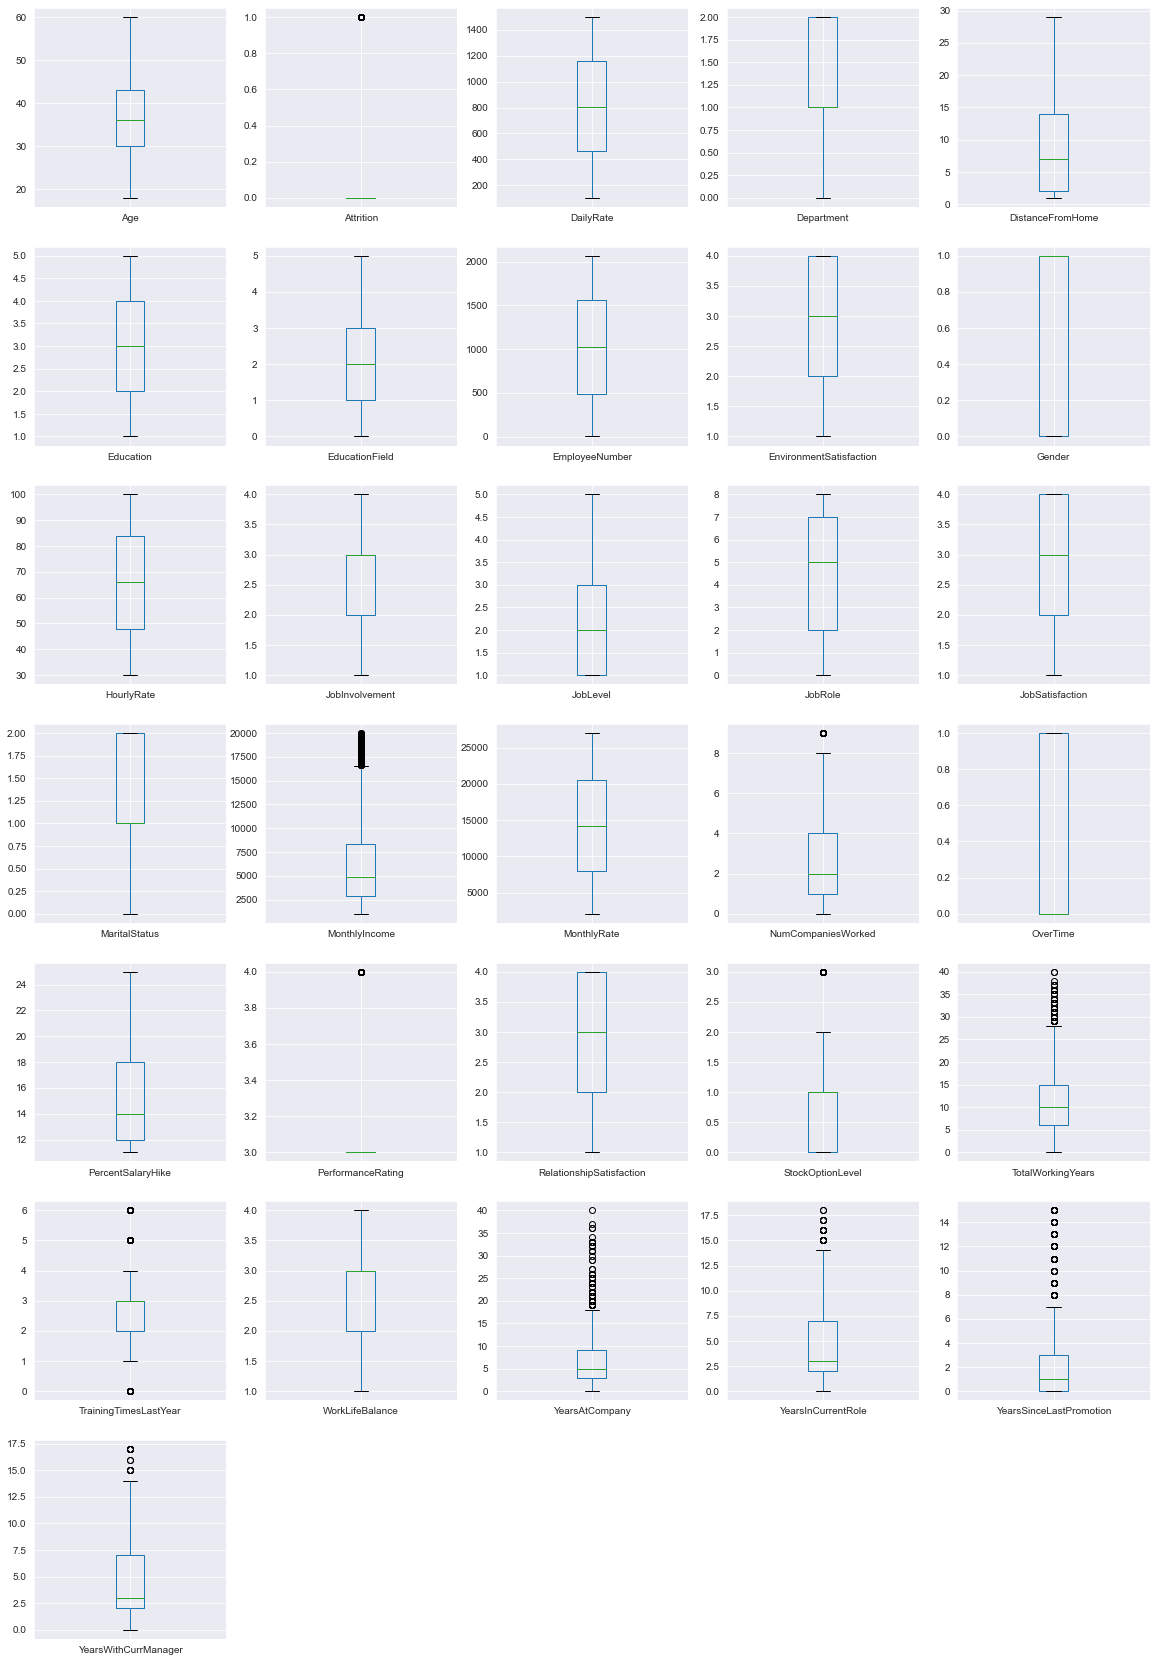

In [125]:
hr_a.plot( kind = 'box', subplots = True, layout =(7,5), figsize=(20,30))
sns.set_style('darkgrid')
plt.show()

In [126]:
# Removing skewness using log method
list = ['Age','DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i in list:
    if hr_a[i].skew()>0.5:
        hr_a[i]=np.log1p(hr_a[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
hr_a.skew() # Rechecking skewness

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

# Building the Model

In [128]:
# importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.linear_model import LogisticRegression

In [129]:
# Creating independent & dependent variable
x = pd.DataFrame(hr_a.drop(['Attrition'], axis=1))
y = hr_a['Attrition']

<IPython.core.display.Javascript object>

In [130]:
#Checking shape of variables for the model
print(x.shape)
print(y.shape)

(1470, 30)
(1470,)


In [131]:
# identifying Best Random state
import warnings
warnings.filterwarnings('ignore')
best_r_state = 0
accu = 0
for i in range (30,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    svc =LogisticRegression()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 90.12345679012346% best random state is 670


In [132]:
# Identifying best algorithm with identified random state
import warnings
warnings.filterwarnings('ignore')
list=[LogisticRegression(),KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(), 
      DecisionTreeClassifier(), xgboost.XGBClassifier(), GradientBoostingClassifier()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 670)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between accuracy score & cv score = {round((accuracy_score(y_test,pred)*100)-(cv_score*100))}\n')

For algorithm LogisticRegression() Accuracy Score is 90.81632653061224
For algorithm LogisticRegression() cross validation score is 84.8299319727891
Difference between accuracy score & cv score = 6.0

For algorithm KNeighborsClassifier() Accuracy Score is 84.35374149659864
For algorithm KNeighborsClassifier() cross validation score is 81.15646258503402
Difference between accuracy score & cv score = 3.0

For algorithm RandomForestClassifier() Accuracy Score is 91.15646258503402
For algorithm RandomForestClassifier() cross validation score is 85.64625850340136
Difference between accuracy score & cv score = 6.0

For algorithm AdaBoostClassifier() Accuracy Score is 92.17687074829932
For algorithm AdaBoostClassifier() cross validation score is 86.12244897959182
Difference between accuracy score & cv score = 6.0

For algorithm DecisionTreeClassifier() Accuracy Score is 81.63265306122449
For algorithm DecisionTreeClassifier() cross validation score is 75.17006802721087
Difference between accu

In [133]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(100,1000,100), 'learning_rate': [0.001,0.01,0.1,0.2,0.5]}
adbc = AdaBoostClassifier()
clf=GridSearchCV(adbc,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [134]:
# Building the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 670)
adbc = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 300)
adbc.fit(x_train,y_train)
pred = adbc.predict(x_test)
cv_score = cross_val_score(m,x,y,cv= 10).mean()
print(f'Accuracy Score is {accuracy_score(y_test,pred)*100}')
print(f'Confusion matrix is \n {confusion_matrix(y_test,pred)}')
print(f'Classification report is \n {classification_report(y_test,pred)}')

Accuracy Score is 92.17687074829932
Confusion matrix is 
 [[259   5]
 [ 18  12]]
Classification report is 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       264
           1       0.71      0.40      0.51        30

    accuracy                           0.92       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.91      0.92      0.91       294



In [135]:
#Testing the model
pred_y = adbc.predict(x)

The auc score is 88.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

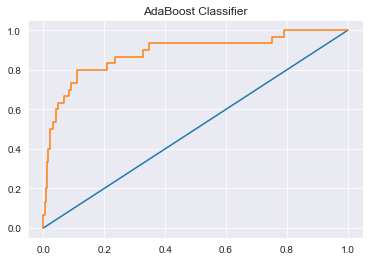

In [142]:
# Ploting AUC & ROC curve to check probability of pridiction
y_pred_prob = adbc.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(f'The auc score is {round(auc_score*100)}%')
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'AdaBoost Classifier')
plt.title('AdaBoost Classifier')
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

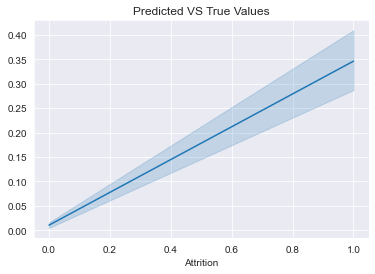

In [141]:
# Predicted Vs True value plot
sns.lineplot(y,pred_y)
plt.title('Predicted VS True Values')
plt.show()

# Saving the best Model

In [138]:
import joblib
joblib.dump(adbc,'HR_Analytics.obj')

['HR_Analytics.obj']

In [139]:
joblib.load('HR_Analytics.obj')

AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

# Based on above two graphs it can be estimated that model is correctly predicting True False rate i.e 88% probability of correct pridiction, Hence more data is needed in Turnover cases to learn properly. Company can also develop a strategic plan to identify high risk employees & low risk employees based on the predictions and according minimize overheads, Hence improve efficiency